In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [5]:
def linear_search(array, value_to_search):
    for value, index in enumerate(array):
        if value == value_to_search:
            return index
    return None;

In [6]:
def binary_search_recursive(sorted_array, start_index, end_index, value_to_search):
    # Both start and end are inclusive
    if start_index > end_index:
        return None
    
    mid_index = (start_index + end_index) // 2
    
    if value_to_search < sorted_array[mid_index]:
        return binary_search_with_bounds(sorted_array, start_index, mid_index - 1, value_to_search)
    
    if value_to_search > sorted_array[mid_index]:
        return binary_search_with_bounds(sorted_array, mid_index + 1, end_index, value_to_search)
    
    if value_to_search == sorted_array[mid_index]:
        return mid_index
    
    raise Exception("you fucked up")
    # unreachable

def binary_search_iterative(sorted_array, start_index, end_index, value_to_search):
    # Both start and end are inclusive
    while start_index < end_index:
        mid_index = (start_index + end_index) // 2
        
        if value_to_search <= sorted_array[mid_index]:
            end_index = mid_index
    
        if value_to_search > sorted_array[mid_index]:
            start_index = mid_index + 1
    
    if start_index == end_index and value_to_search == sorted_array[start_index]:
        return start_index
        
    return None


def binary_search(sorted_array, value_to_search):
    return binary_search_iterative(sorted_array, 0, len(sorted_array) - 1, value_to_search)

In [7]:
print('Testing empty array:')
print(binary_search([], 1))
print()

print('Testing size 1 array:')
print(binary_search([1], 1))
print(binary_search([2], 1))
print()

print('Testing even size array:')
print(binary_search([1, 2], 1))
print(binary_search([1, 2], 2))
print(binary_search([1, 2], 3))
print()

print('Testing odd sized array:')
print(binary_search([1, 2, 3], 1))
print(binary_search([1, 2, 3], 2))
print(binary_search([1, 2, 3], 3))
print(binary_search([1, 2, 3], 4))
print()

Testing empty array:
None

Testing size 1 array:
0
None

Testing even size array:
0
1
None

Testing odd sized array:
0
1
2
None



In [17]:
df = pd.DataFrame(columns=("algorithm", "array_size", "value_to_search", "time"));

sizes = np.arange(1, 1000)
# 10 takes less than minute
# 100 will take some time
number_of_trials = 100

for array_size in sizes:
    arr = np.arange(array_size)
    
    value_to_search = np.random.choice(arr, number_of_trials)
    
    for i in value_to_search:
        start = timer()
        index = binary_search(arr, i)
        end = timer()
        delta = end - start
        
        new_row = {
            "algorithm": "binary search",
            "array_size": array_size,
            "value_to_search": i,
            "time": delta
        }
        
        df.loc[len(df)] = new_row
    
    rng = np.random.default_rng()
    rng.shuffle(arr)
    
    for i in value_to_search:
        start = timer()
        index = linear_search(arr, i)
        end = timer()
        delta = end - start
        
        new_row = {
            "algorithm": "linear search",
            "array_size": array_size,
            "value_to_search": i,
            "time": delta
        }
        
        df.loc[len(df)] = new_row

df

,algorithm,array_size,value_to_search,time
0,binary search,1,0,0.000009
1,binary search,1,0,0.000006
2,binary search,1,0,0.000004
3,binary search,1,0,0.000007
4,binary search,1,0,0.000006
...,...,...,...,...
199795,linear search,999,50,0.000016
199796,linear search,999,507,0.000107
199797,linear search,999,465,0.000099
199798,linear search,999,118,0.000029


<AxesSubplot:xlabel='array_size', ylabel='time'>

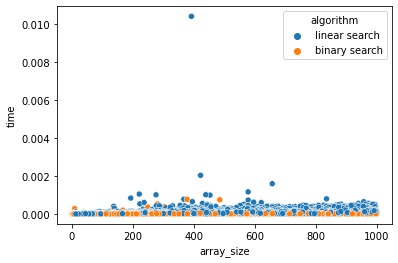

In [249]:
df_sample_both = df.sample(50000)
sns.scatterplot(data=df_sample_both, x="array_size", y="time", hue="algorithm")

In [225]:
df_without_outliers = df[['algorithm', 'array_size', 'time']]
# stats.zscore is not working properly because data is very different from normal
def is_outlier(x):
    return (x <= x.quantile(0.001)) | (x >= x.quantile(0.9))
df_without_outliers['is_outlier'] = df_without_outliers.groupby(['algorithm', 'array_size'], as_index=False)['time'].transform(is_outlier)
df_without_outliers = df_without_outliers[df_without_outliers['is_outlier'] == False]

<AxesSubplot:xlabel='array_size', ylabel='time'>

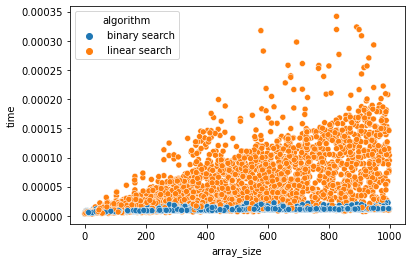

In [262]:
df_sample_both = df_without_outliers.sample(5000)
sns.scatterplot(data=df_sample_both, x="array_size", y="time", hue="algorithm")

So worst case of linear search looks really close to linear function, because time complexity O(n). Except some outliers (probably) and strange bump around array_size = 400

<AxesSubplot:xlabel='array_size', ylabel='time'>

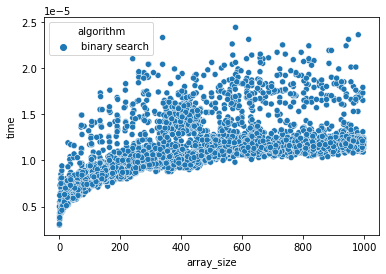

In [263]:
df_binary = pd.DataFrame(df_without_outliers[df_without_outliers['algorithm'] == 'binary search'])
df_binary_sample = df_binary.sample(5000)
sns.scatterplot(data=df_binary_sample, x="array_size", y="time", hue="algorithm")

For binary search best case is clearly follows O(log(n)). Worst case is a bit more noisy and also has that bump at 400, but still looks logarithmic

<AxesSubplot:xlabel='array_size', ylabel='mean_time'>

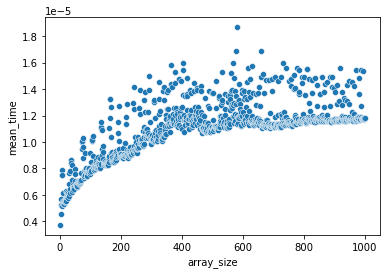

In [270]:
df_binary_mean_times = df_binary.groupby('array_size', as_index=False).agg(mean_time=pd.NamedAgg(column="time", aggfunc="mean"))
sns.scatterplot(data=df_binary_mean_times, x="array_size", y="mean_time")

And average case still looks logarithmic

<AxesSubplot:xlabel='array_size', ylabel='time'>

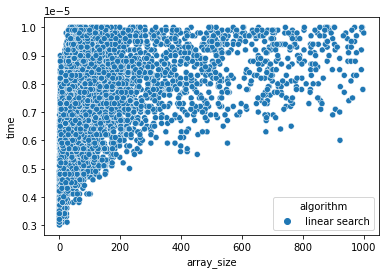

In [259]:
df_sample_binary = df_without_outliers[(df_without_outliers['algorithm'] == 'linear search') & (df_without_outliers['time'] < 0.00001)].sample(5000)
sns.scatterplot(data=df_sample_binary, x="array_size", y="time", hue="algorithm")

Best case for linear search looks curious, It should be O(n). But looks like logarithm or root. I assume that this is consequence of fixed amount of trials and sample size, so actual best case of searching for first element has very low probability

<AxesSubplot:xlabel='array_size', ylabel='mean_time'>

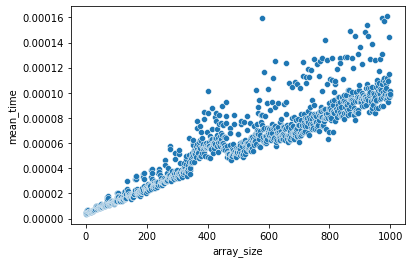

In [274]:
df_linear = pd.DataFrame(df_without_outliers[df_without_outliers['algorithm'] == 'linear search'])
df_linear_mean_times = df_linear.groupby('array_size', as_index=False).agg(mean_time=pd.NamedAgg(column="time", aggfunc="mean"))
sns.scatterplot(data=df_linear_mean_times, x="array_size", y="mean_time")

And of course average case for linear search is also linear